In [28]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv("customer_churn_dataset.csv")

In [2]:
df.head()

,customer_id,tenure,monthly_charges,total_charges,contract,payment_method,internet_service,tech_support,online_security,support_calls,churn
0,1,52,54.20,2818.40,Month-to-month,Credit,DSL,No,Yes,1,No
1,2,15,35.28,529.20,Month-to-month,Debit,DSL,No,No,2,No
2,3,72,78.24,5633.28,Month-to-month,Debit,DSL,No,No,0,No
3,4,61,80.24,4894.64,One year,Cash,Fiber,Yes,Yes,0,No
4,5,21,39.38,826.98,Month-to-month,UPI,Fiber,No,No,4,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       20000 non-null  int64  
 1   tenure            20000 non-null  int64  
 2   monthly_charges   20000 non-null  float64
 3   total_charges     20000 non-null  float64
 4   contract          20000 non-null  object 
 5   payment_method    20000 non-null  object 
 6   internet_service  17987 non-null  object 
 7   tech_support      20000 non-null  object 
 8   online_security   20000 non-null  object 
 9   support_calls     20000 non-null  int64  
 10  churn             20000 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 1.7+ MB


In [4]:
df.drop(columns=['customer_id']).describe()

,tenure,monthly_charges,total_charges,support_calls
count,20000.000000,20000.000000,20000.000000,20000.00000
mean,36.467450,70.010531,2543.979209,1.51255
std,20.773984,28.890239,1882.949804,1.23524
min,1.000000,20.000000,20.230000,0.00000
25%,18.000000,45.210000,1045.837500,1.00000
50%,36.000000,70.090000,2096.495000,1.00000
75%,54.000000,95.072500,3690.337500,2.00000
max,72.000000,120.000000,8629.920000,8.00000


In [5]:
df.shape

(20000, 11)

In [30]:
df.isnull().sum()

customer_id            0
tenure                 0
monthly_charges        0
total_charges          0
contract               0
payment_method         0
internet_service    2013
tech_support           0
online_security        0
support_calls          0
churn                  0
dtype: int64

In [36]:
def plot_missing_values(dataframe, title='Missing Values Per Column'):
    
    missing = dataframe.isnull().sum()
    plt.figure(figsize=(10,5))
    bars = plt.bar(missing.index, missing.values)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height,
            int(height),
            ha='center',
            va='bottom'
        )

    plt.title(title)
    plt.ylabel('Missing Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.2)
    plt.show()

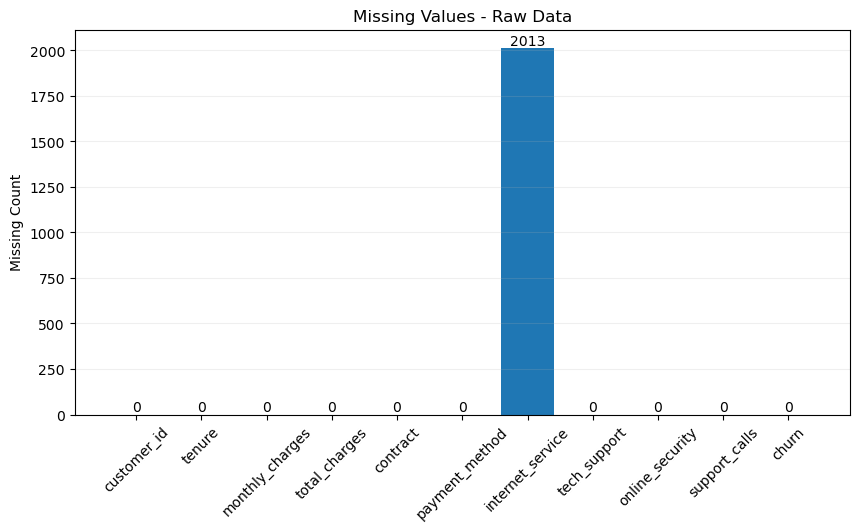

In [34]:
plot_missing_values(df, 'Missing Values - Raw Data')

In [7]:
mode_value = df['internet_service'].mode()[0] 
print(mode_value) 
df['internet_service'] = df['internet_service'].fillna(mode_value) 
df.isnull().sum()

Fiber


customer_id         0
tenure              0
monthly_charges     0
total_charges       0
contract            0
payment_method      0
internet_service    0
tech_support        0
online_security     0
support_calls       0
churn               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
categorical_columns = df.select_dtypes(include='object').columns # Identifying categorical features (columns)
print(categorical_columns) 

Index(['contract', 'payment_method', 'internet_service', 'tech_support',
       'online_security', 'churn'],
      dtype='object')


In [10]:
df = pd.get_dummies(df, columns=['contract', 'payment_method', 'internet_service', 'tech_support', 'online_security'])
df['churn'] = df['churn'].map({'Yes': 1, 'No': 0})
df.shape

(20000, 19)

In [21]:
columns_to_drop = ['churn']
if 'customer_id' in df.columns:
    columns_to_drop.append('customer_id')

X = df.drop(columns=columns_to_drop)
y = df['churn']

numeric_cols = X.select_dtypes(include='number').columns

scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [22]:
z_scores = np.abs((X[numeric_cols] - X[numeric_cols].mean()) / X[numeric_cols].std())

outliers = z_scores > 3
print(outliers.sum().sum())

X = X[~outliers.any(axis=1)]
y = y[X.index] 

136


In [23]:
customer_ids = df['customer_id']
df = df.drop(columns=['customer_id'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15892, 9)
(15892,)
(3973, 9)
(3973,)


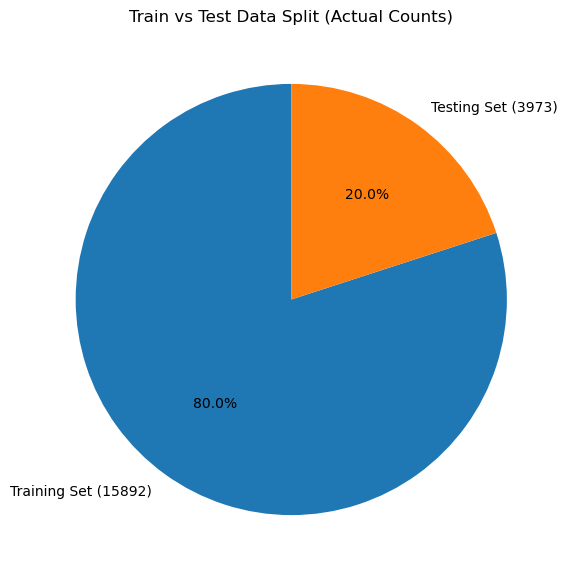

In [35]:
train_size = len(X_train)
test_size = len(X_test)

labels = [f'Training Set ({train_size})', f'Testing Set ({test_size})']
sizes = [train_size, test_size]

plt.figure(figsize=(7,7))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)

plt.title('Train vs Test Data Split (Actual Counts)')
plt.show()